# CpG 1kb

In [13]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [14]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Sequence')

## add 1kb from the same CHM

In [15]:
freq_df_dict_same = {}
# for kmer in ['CpG', 'ZFP57'] :
for kmer in ['CpG'] :
    freq_df_dict_same[kmer] = {}
    for process in [
                'Universal', 
                'UniversalComplement',
                'EarlyEmbryogenesisComplement', # 
                'PGCsDevelopmentComplement', # 
                'SpermatogenesisComplement', # 
                'RetinalDevelopmentComplement',
                'HeartDevelopmentComplement', #
                'LiverDevelopmentComplement', #
                ] :
        try :
            df = pd.read_csv(f'{kmer}Frequency_1kb/{process}_CHM30CpG1kb_{kmer}.CHMnum.bed', header = None, 
                                                        names = ['#chrom', 'start', 'end', 'Kmer_Name', 'Mean_Kmer_Ratio', 'Higher_Ratio_Strand', 'CHM_name',],
                                                        sep = "\t")
            freq_df_dict_same[kmer][process] = df.groupby(['CHM_name']).mean().reset_index()[['CHM_name', 'Mean_Kmer_Ratio']]
            
        except :
            print(f'{kmer}Frequency_1kb/{process}_CHM30CpG1kb_{kmer}.CHMnum.bed')
            break
    
    freq_df_dict_same[kmer]['nonCHM_CpG_riched1kb'] = pd.read_csv(f'{kmer}Frequency_1kb/nonCHM_CpG_riched1kb_CHM_{kmer}.bed', header = 0, sep = "\t")
    freq_df_dict_same[kmer]['nonCHM_CpG_riched1kb']['CHM_name'] = freq_df_dict_same[kmer]['nonCHM_CpG_riched1kb']['Kmer_Name'].str.split('.', expand = True)[0].str.split('_', expand = True)[1]

freq_df_dict_same[kmer]['UniversalComplement']

,CHM_name,Mean_Kmer_Ratio
0,UniversalComplement_10,0.0320
1,UniversalComplement_10048,0.0315
2,UniversalComplement_1005,0.0490
3,UniversalComplement_10050,0.0420
4,UniversalComplement_10056,0.0300
...,...,...
2043,UniversalComplement_9938,0.0560
2044,UniversalComplement_9939,0.0310
2045,UniversalComplement_9951,0.0300
2046,UniversalComplement_9954,0.0490


/tmp/ipykernel_38308/786215899.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tranparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_violin_CpG_freq_1kbAdd_universalProcessComplement.pdf', tranparent = True)


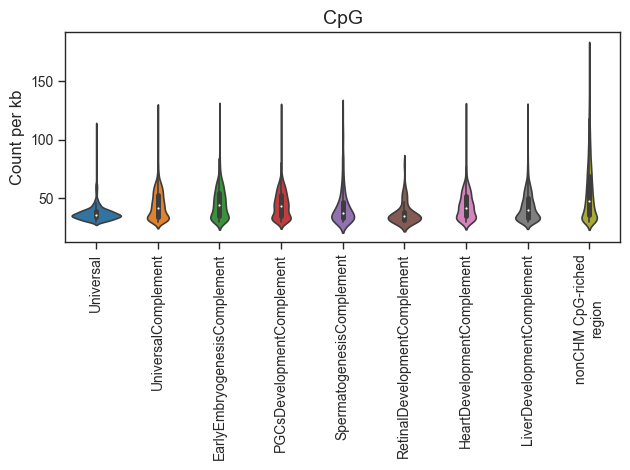

In [16]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    # fig, axes = plt.subplots(1,2, figsize = (6.4 * 1, 4.8 * 1), tight_layout = True)
    # for i,kmer in enumerate(['CpG', 'ZFP57']) :
    for i,kmer in enumerate(['CpG']) :
        # ax = axes[i]
        fig, ax = plt.subplots(1,1, figsize = (6.4 * 1, 4.8 * 1), tight_layout = True)
        df = pd.DataFrame()
        for process in [
                'Universal', 
                'UniversalComplement',
                'EarlyEmbryogenesisComplement', # 
                'PGCsDevelopmentComplement', # 
                'SpermatogenesisComplement', # 
                'RetinalDevelopmentComplement',
                'HeartDevelopmentComplement', #
                'LiverDevelopmentComplement', #
                'nonCHM_CpG_riched1kb'
                ] :
            df = pd.concat([df, freq_df_dict_same[kmer][process][['CHM_name', 'Mean_Kmer_Ratio']]], axis = 0)
            
        df[['Kmer', 'process']] = df['CHM_name'].str.split('_', expand = True)[[1,0]]
        df['process'] = df['process'].str.split('.', expand = True)[0]
        df['frequency_per_kb'] = df['Mean_Kmer_Ratio'] * 1000
        sns.violinplot(data = df,
                       x = 'process',
                       y = 'frequency_per_kb',
                       ax = ax,
                    #    palette = ['#DA404E', '#507F9B']
                      )
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels()[:-1] + ['nonCHM CpG-riched\nregion'], rotation = 90, ha = 'center', va = 'top')
        # ax.set_xticklabels(['Universal\nCHMs', 'nonCHM CpG-riched\nregion'])
        ax.set_title(f'{kmer}')
        ax.set_ylabel("Count per kb")
        ax.set_xlabel("")
#         if kmer == 'CpG' :
#             scale1 = 25
#             scale2 = 75
#         else :
#             scale1 = 0
#             scale2 = 5
#         ax.set_ylim(scale1, scale2)

    # fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_violin_CpG_ZFP57_freq_1kbAdd.pdf', tranparent = True)
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_violin_CpG_freq_1kbAdd_universalProcessComplement.pdf', tranparent = True)
         

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

LiverDevelopmentComplement v.s. NonCHMsCpGrich: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.404e-67 U_stat=9.957e+06
HeartDevelopmentComplement v.s. NonCHMsCpGrich: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.591e-32 U_stat=8.744e+06
RetinalDevelopmentComplement v.s. NonCHMsCpGrich: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.379e-11 U_stat=3.583e+05
SpermatogenesisComplement v.s. NonCHMsCpGrich: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.457e-32 U_stat=3.753e+06
PGCsDevelopmentComplement v.s. NonCHMsCpGrich: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.724e-37 U_stat=1.314e+07
EarlyEmbryogenesisComplement v.s. NonCHMsCpGrich: Mann-Whitney-Wilcoxon test two-sided with Bonferroni cor

/tmp/ipykernel_38308/2477938445.py:72: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tranparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_box_CpG_freq_1kbAdd_universalProcessSpecific.pdf', tranparent = True)


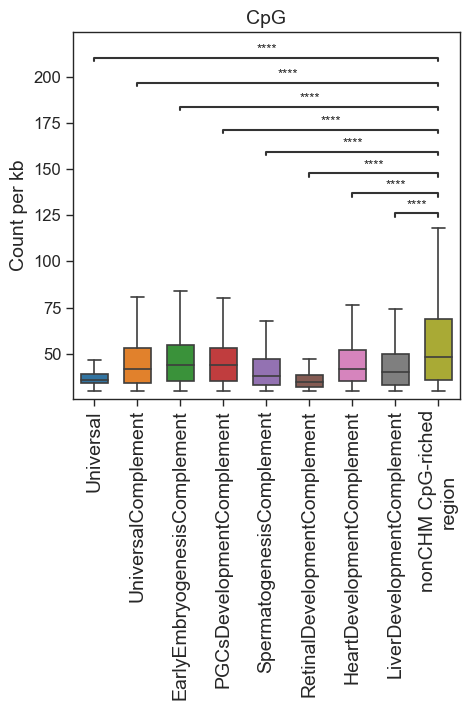

In [20]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 14,
                             'xtick.labelsize': 14,
                             'ytick.labelsize': 12,
                             'legend.fontsize': 10
                         }):
    # fig, axes = plt.subplots(1,2, figsize = (6.4 * 1, 4.8 * 1), tight_layout = True)
    # for i,kmer in enumerate(['CpG', 'ZFP57']) :
    for i,kmer in enumerate(['CpG']) :
        # ax = axes[i]
        fig, ax = plt.subplots(1,1, figsize = (6.4 * .75, 4.8 * 1.5), tight_layout = True)
        df = pd.DataFrame()
        for process in [
                'Universal', 
                'UniversalComplement',
                'EarlyEmbryogenesisComplement', # 
                'PGCsDevelopmentComplement', # 
                'SpermatogenesisComplement', # 
                'RetinalDevelopmentComplement',
                'HeartDevelopmentComplement', #
                'LiverDevelopmentComplement', #
                'nonCHM_CpG_riched1kb'
                ] :
            df = pd.concat([df, freq_df_dict_same[kmer][process][['CHM_name', 'Mean_Kmer_Ratio']]], axis = 0)
            
        df[['Kmer', 'process']] = df['CHM_name'].str.split('_', expand = True)[[1,0]]
        df['process'] = df['process'].str.split('.', expand = True)[0]
        df['frequency_per_kb'] = df['Mean_Kmer_Ratio'] * 1000
        sns.boxplot(data = df,
                       x = 'process',
                       y = 'frequency_per_kb',
                       ax = ax,
                       showfliers = False,
                       width=0.618,
                    #    palette = ['#DA404E', '#507F9B']
                      )
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'center', va = 'top')
        
        add_stat_annotation(ax, data=df, x='process', y='frequency_per_kb',
                    box_pairs=[(x, 'NonCHMsCpGrich') for x in ['Universal', 
                                                               'UniversalComplement',
                                                               'EarlyEmbryogenesisComplement', # 
                                                               'PGCsDevelopmentComplement', # 
                                                               'SpermatogenesisComplement', # 
                                                               'RetinalDevelopmentComplement',
                                                               'HeartDevelopmentComplement', #
                                                               'LiverDevelopmentComplement', ]],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels()[:-1] + ['nonCHM CpG-riched\nregion'], rotation = 90, ha = 'center', va = 'top')
        # ax.set_xticklabels(['Universal\nCHMs', 'nonCHM CpG-riched\nregion'])
        ax.set_title(f'{kmer}')
        ax.set_ylabel("Count per kb")
        ax.set_xlabel("")
#         if kmer == 'CpG' :
#             scale1 = 25
#             scale2 = 75
#         else :
#             scale1 = 0
#             scale2 = 5
#         ax.set_ylim(scale1, scale2)

    # fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_violin_CpG_ZFP57_freq_1kbAdd.pdf', tranparent = True)
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_box_CpG_freq_1kbAdd_universalProcessSpecific.pdf', tranparent = True)
         

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

UniversalComplement v.s. NonCHMsCpGrich: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.759e-62 U_stat=1.758e+07
Universal v.s. NonCHMsCpGrich: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.897e-264 U_stat=1.212e+07


/tmp/ipykernel_38308/3433505170.py:73: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tranparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_box_CpG_freq_1kbAdd_universalComplement.pdf', tranparent = True)


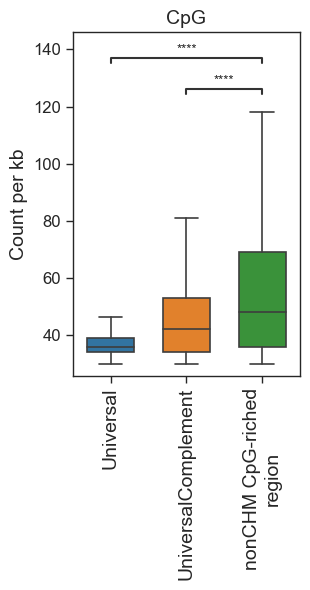

In [22]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 14,
                             'xtick.labelsize': 14,
                             'ytick.labelsize': 12,
                             'legend.fontsize': 10
                         }):
    # fig, axes = plt.subplots(1,2, figsize = (6.4 * 1, 4.8 * 1), tight_layout = True)
    # for i,kmer in enumerate(['CpG', 'ZFP57']) :
    for i,kmer in enumerate(['CpG']) :
        # ax = axes[i]
        fig, ax = plt.subplots(1,1, figsize = (6.4 * .5, 4.8 * 1.25), tight_layout = True)
        df = pd.DataFrame()
        for process in [
                'Universal', 
                'UniversalComplement',
                # 'EarlyEmbryogenesisComplement', # 
                # 'PGCsDevelopmentComplement', # 
                # 'SpermatogenesisComplement', # 
                # 'RetinalDevelopmentComplement',
                # 'HeartDevelopmentComplement', #
                # 'LiverDevelopmentComplement', #
                'nonCHM_CpG_riched1kb'
                ] :
            df = pd.concat([df, freq_df_dict_same[kmer][process][['CHM_name', 'Mean_Kmer_Ratio']]], axis = 0)
            
        df[['Kmer', 'process']] = df['CHM_name'].str.split('_', expand = True)[[1,0]]
        df['process'] = df['process'].str.split('.', expand = True)[0]
        df['frequency_per_kb'] = df['Mean_Kmer_Ratio'] * 1000
        sns.boxplot(data = df,
                       x = 'process',
                       y = 'frequency_per_kb',
                       ax = ax,
                       showfliers = False,
                       width=0.618,
                    #    palette = ['#DA404E', '#507F9B']
                      )
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'center', va = 'top')
        
        add_stat_annotation(ax, data=df, x='process', y='frequency_per_kb',
                    box_pairs=[(x, 'NonCHMsCpGrich') for x in ['Universal', 
                                                               'UniversalComplement',
                                                            #    'EarlyEmbryogenesisComplement', # 
                                                            #    'PGCsDevelopmentComplement', # 
                                                            #    'SpermatogenesisComplement', # 
                                                            #    'RetinalDevelopmentComplement',
                                                            #    'HeartDevelopmentComplement', #
                                                            #    'LiverDevelopmentComplement', 
                                                               ]],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels()[:-1] + ['nonCHM CpG-riched\nregion'], rotation = 90, ha = 'center', va = 'top')
        # ax.set_xticklabels(['Universal\nCHMs', 'nonCHM CpG-riched\nregion'])
        ax.set_title(f'{kmer}')
        ax.set_ylabel("Count per kb")
        ax.set_xlabel("")
#         if kmer == 'CpG' :
#             scale1 = 25
#             scale2 = 75
#         else :
#             scale1 = 0
#             scale2 = 5
#         ax.set_ylim(scale1, scale2)

    # fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_violin_CpG_ZFP57_freq_1kbAdd.pdf', tranparent = True)
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_box_CpG_freq_1kbAdd_universalComplement.pdf', tranparent = True)
         

In [18]:
df

,CHM_name,Mean_Kmer_Ratio,Kmer,process,frequency_per_kb
0,Universal_1,0.0355,1,Universal,35.5
1,Universal_10,0.0300,10,Universal,30.0
2,Universal_100,0.0390,100,Universal,39.0
3,Universal_1000,0.0600,1000,Universal,60.0
4,Universal_1001,0.0320,1001,Universal,32.0
...,...,...,...,...,...
22064,NonCHMsCpGrich,0.0400,None,NonCHMsCpGrich,40.0
22065,NonCHMsCpGrich,0.0820,None,NonCHMsCpGrich,82.0
22066,NonCHMsCpGrich,0.0590,None,NonCHMsCpGrich,59.0
22067,NonCHMsCpGrich,0.0550,None,NonCHMsCpGrich,55.0


<ipython-input-9-f6627a21ff82>:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tranparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_box_CpG_ZFP57_freq_1kbAdd.pdf', tranparent = True)


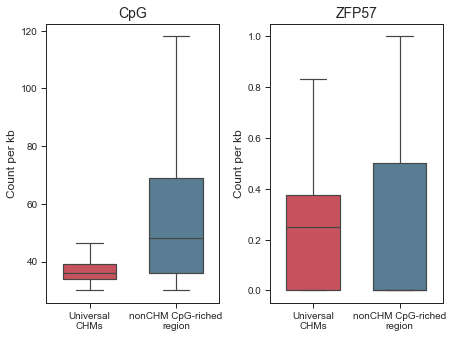

In [9]:
# not used

# with sns.axes_style('white', rc={
#         'xtick.bottom': True,
#         'ytick.left': True
# }), sns.plotting_context('paper',
#                          rc={
#                              'axes.titlesize': 14,
#                              'axes.labelsize': 12,
#                              'xtick.labelsize': 10,
#                              'ytick.labelsize': 10,
#                              'legend.fontsize': 10
#                          }):
#     fig, axes = plt.subplots(1,2, figsize = (6.4 * 1, 4.8 * 1), tight_layout = True)
#     for i,kmer in enumerate(['CpG', 'ZFP57']) :
#         ax = axes[i]
#         df = pd.DataFrame()
#         for process in ['Universal', 'nonCHM_CpG_riched1kb'] :
#             df = pd.concat([df, freq_df_dict_same[kmer][process][['CHM_name', 'Mean_Kmer_Ratio']]], axis = 0)
            
#         df[['Kmer', 'process']] = df['CHM_name'].str.split('_', expand = True)[[1,0]]
#         df['process'] = df['process'].str.split('.', expand = True)[0]
#         df['frequency_per_kb'] = df['Mean_Kmer_Ratio'] * 1000
#         sns.boxplot(data = df,
#                        x = 'process',
#                        y = 'frequency_per_kb',
#                        ax = ax,
#                        palette = ['#DA404E', '#507F9B'],
#                        showfliers = False,
#                        width = 0.618
#                       )
#         ax.set_xticks([0,1])
# #             ax.set_xticklabels(ax.get_xticklabels()[:-1] + ['nonCHM CpG-riched\nregion'], rotation = 90, ha = 'center', va = 'top')
#         ax.set_xticklabels(['Universal\nCHMs', 'nonCHM CpG-riched\nregion'])
#         ax.set_title(f'{kmer}')
#         ax.set_ylabel("Count per kb")
#         ax.set_xlabel("")
# #         if kmer == 'CpG' :
# #             scale1 = 25
# #             scale2 = 75
# #         else :
# #             scale1 = 0
# #             scale2 = 5
# #         ax.set_ylim(scale1, scale2)

#     fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make10_box_CpG_ZFP57_freq_1kbAdd.pdf', tranparent = True)
         

In [8]:
from scipy import stats
for i,kmer in enumerate(['CpG', 'ZFP57']) :
    df = pd.DataFrame()
    for process in ['Universal', 'nonCHM_CpG_riched1kb'] :
        df = pd.concat([df, freq_df_dict_same[kmer][process][['CHM_name', 'Mean_Kmer_Ratio']]], axis = 0)
        
    df[['Kmer', 'process']] = df['CHM_name'].str.split('_', expand = True)[[1,0]]
    df['process'] = df['process'].str.split('.', expand = True)[0]
    df['frequency_per_kb'] = df['Mean_Kmer_Ratio'] * 1000
    res = stats.mannwhitneyu(df.loc[df['process'] == 'Universal']['frequency_per_kb'], 
                       df.loc[df['process'] == 'NonCHMsCpGrich']['frequency_per_kb'], 
                       alternative = 'two-sided',
                       use_continuity = True
                      )
    print(res)

MannwhitneyuResult(statistic=12123263.0, pvalue=1.9486598095741167e-264)
MannwhitneyuResult(statistic=21884155.0, pvalue=0.009413732366490813)


In [1]:
print(1)

1
